# INFORMATIE VISUALISATIE GROEP I3
*Yurish Koebeer, Abuzar Hosseini, Mohamed el Harchaoui en Mouad Kasmi*

## Introductie
Immigratie en de invloed ervan op de lonen van Amerikaanse werknemers is een veelbesproken onderwerp. Sommige mensen denken dat een toestroom van immigranten het arbeidsaanbod vergroot, wat de lonen kan verlagen, vooral in laaggeschoolde sectoren. Dit komt doordat de concurrentie voor banen toeneemt, wat de onderhandelingspositie van inheemse werknemers verzwakt.

Aan de andere kant zijn er mensen die geloven dat immigranten de economische groei stimuleren, essentiële rollen vervullen en innovatie bevorderen. Dit zou uiteindelijk kunnen leiden tot hogere lonen en meer welvaart voor iedereen.

Een recent voorbeeld is het beleid van voormalig president Donald Trump. Tijdens zijn presidentschap werden maatregelen genomen om de immigratie te beperken, zoals strengere regels voor asielaanvragen en het blokkeren van migranten uit bepaalde landen. In dezelfde periode zagen we een daling van de werkloosheid en een stijging van de lonen. De vraag is echter of deze verbeteringen direct toe te schrijven zijn aan de afname van de immigratie, of dat er andere factoren meespelen.

In deze studie onderzoeken we deze verschillende perspectieven en proberen we de complexe dynamiek van immigratie en de effecten ervan op de Amerikaanse arbeidsmarkt te begrijpen.

## Dataset en Voorverwerking

In eerste instantie hebben we besloten dat elk teamlid ten minste één dataset van interesse moest vinden met voldoende gegevens waaruit ten minste twee perspectieven kunnen worden afgeleid. Tijdens de eerste teamvergadering werd elke dataset besproken samen met mogelijke correlaties. Uiteindelijk hebben we de datasets gekozen van [US Immigration Statistics (1980-2021)](https://www.kaggle.com/datasets/justin2028/us-immigration-statistics-1980-2021) en [Minimum Wage by State](https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017), omdat deze datasets correlaties hebben die nuttig kunnen zijn voor onze studie. Na wat brainstormen tijdens teamvergaderingen, hebben we besloten om de impact van immigratie op de lonen van Amerikaanse werknemers te onderzoeken.

### Opschonen

Elke dataset bevatte enkele wijzigingen vergeleken met andere jaren, zoals kolomhernoemingen of structurele wijzigingen. We moesten twee fasen doorlopen om alles correct op te schonen. De eerste fase is waarin kolommen worden hernoemd en herstructureerd om ze samen te voegen. Kolommen zijn handmatig samengevoegd door ze één voor één te inspecteren en de kolommen samen te voegen die ongeveer dezelfde naam of inhoud hebben qua wat ze vertegenwoordigen. Kolommen die niet nuttig waren, werden onmiddellijk uitgesloten tijdens dit proces.

De tweede fase omvat het normaliseren van de data. In het algemeen is dit gedaan door de unieke waarden voor elke kolom grondig te inspecteren en waarden die dezelfde betekenis vertegenwoordigen te combineren.

Ten slotte hebben we besloten om parquet (`.parquet`) te gebruiken als het bestandstype voor onze uiteindelijke dataset. Dit stelt ons in staat om het datatype voor elke kolom te specificeren en de algehele bestandsgrootte van de uiteindelijke dataset te verkleinen met extra gzip-compressie. Dit resulteerde in een 7.2MB parquet-bestand, in plaats van een 145MB CSV-bestand.

Uiteindelijk zijn in totaal 955 kolommen uit de twee datasets teruggebracht tot één dataset met 19 kolommen en 535,759 rijen.

### Variabele Beschrijvingen

Qua variabele type en meetschaal kunnen de variabelen in de uiteindelijke dataset worden ingedeeld in verschillende combinaties:

- **Continue / Ratio variabelen:** Year, Immigrants Obtaining Lawful Permanent Resident Status, Average Wage, CPI.Average, High.2018, Low.2018
- **Discrete / Ordinale variabelen:** Immigrant Population Level
- **Discrete / Nominale variabelen:** Sector

Variabelen die momenteel worden gebruikt zijn: Year, Immigrants Obtaining Lawful Permanent Resident Status, Average Wage, CPI.Average, High.2018, Low.2018, Immigrant Population Level, Sector

### Aggregaties

In het algemeen worden de meeste aggregaties uitgevoerd om de impact van immigratie op lonen in verhouding tot de Amerikaanse beroepsbevolking te berekenen. Dit wordt gedaan door het gemiddelde loon voor zowel sectoren met een hoge als lage immigrantenpopulatie te nemen, deze te vergelijken en trends in de tijd af te leiden. In wiskundige notatie is dit gedefinieerd als:

$$
\text{Wage Difference} = \frac{\text{Mean Wage in High Immigrant Population Sectors} - \text{Mean Wage in Low Immigrant Population Sectors}}{\text{Mean Wage in Low Immigrant Population Sectors}}
$$

In de meeste grafieken wordt een percentage gebruikt, wat de bovenstaande formule vermenigvuldigd met 100 is.

**Voorbeeld:**
Stel dat in de Verenigde Staten het gemiddelde jaarlijkse loon voor sectoren met hoge immigrantenpopulaties \\$50.000 is en voor sectoren met lage immigrantenpopulaties \\$55.000. Dan is het loonverschil -9,1% met behulp van de bovengenoemde berekening. Als sectoren met hoge immigrantenpopulaties \\$60.000 per jaar zouden verdienen en sectoren met lage immigrantenpopulaties \\$55.000 per jaar zouden verdienen, dan is het loonverschil +9,1%. We noemen de procentuele uitkomst een positieve verschil als het percentage positief is. Wanneer de uitkomst negatief is, wordt het beschouwd als een negatieve verschil. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
dataset1 = pd.read_csv('immigration_statistics_us.csv', encoding='ISO-8859-1')
dataset2 = pd.read_csv('minimum_wage_us.csv', encoding='ISO-8859-1')

In [4]:
# Display the first 5 rows of each dataset
print("First Dataset Head:")
dataset1.head()

First Dataset Head:


,ï»¿Year,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
0,1980,"524,295","207,116","910,361","18,013","719,211"
1,1981,"595,014","159,252","975,780","17,379","823,875"
2,1982,"533,624","98,096","970,246","15,216","812,572"
3,1983,"550,052","61,218","1,251,357","19,211","931,600"
4,1984,"541,811","70,393","1,246,981","18,696","909,833"


In [5]:
print("First Dataset Tail:")
dataset1.tail()

First Dataset Tail:


,ï»¿Year,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
37,2017,"1,127,167","53,691","607,677","284,298","100,454"
38,2018,"1,096,611","22,405","739,486","327,554","159,960"
39,2019,"1,031,765","29,916","1,175,841","347,183","171,125"
40,2020,"707,362","11,840","609,265","237,861","167,453"
41,2021,"740,002","11,454","1,865,379","89,191","178,227"


In [6]:
print("\nSecond Dataset Head:")
dataset2.head()


Second Dataset Head:


,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [7]:
print("First Dataset Tail:")
dataset2.tail()

First Dataset Tail:


,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25,7.25,7.25,7.25,[c]
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50,13.50,13.50,13.50,NaN
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75,8.75,8.75,8.75,NaN
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN
2861,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,5.15,5.15,5.15,5.15,NaN


In [8]:
dataset1['Immigrants Obtaining Lawful Permanent Resident Status'] = dataset1['Immigrants Obtaining Lawful Permanent Resident Status'].str.replace(',', '').astype(int)

c:\Users\Mouad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mouad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


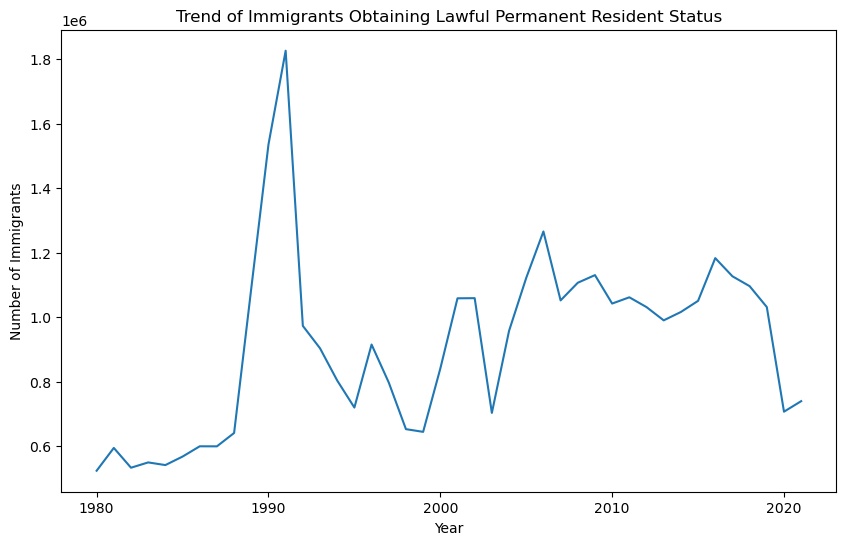

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ï»¿Year', y='Immigrants Obtaining Lawful Permanent Resident Status', data=dataset1)
plt.title('Trend of Immigrants Obtaining Lawful Permanent Resident Status')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

Uit deze grafiek blijkt dat er grote fluctuaties zijn in het aantal "Immigrants Obtaining Lawful Permanent Resident Status". Vooral rond 1990 is er een duidelijke piek te zien. Dit kan wijzen op beleidswijzigingen of andere socio-economische factoren die de immigratie in die periode hebben beïnvloed.

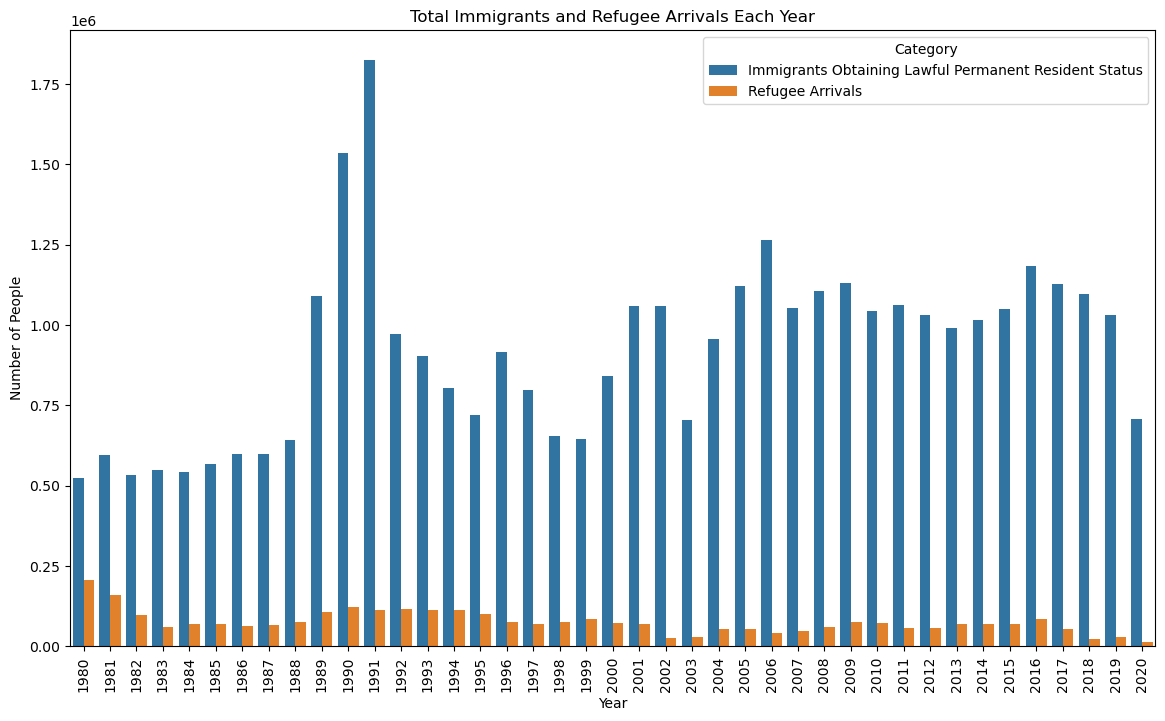

In [10]:
dataset1.columns = dataset1.columns.str.strip()

columns_to_convert = [
    'Immigrants Obtaining Lawful Permanent Resident Status', 
    'Refugee Arrivals', 
    'Noncitizen Apprehensions', 
    'Noncitizen Removals', 
    'Noncitizen Returns'
]

for column in columns_to_convert:
    dataset1[column] = dataset1[column].apply(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)

merged_data = pd.merge(dataset1, dataset2, left_on='ï»¿Year', right_on='Year')

grouped_data = merged_data[['ï»¿Year', 'Immigrants Obtaining Lawful Permanent Resident Status', 'Refugee Arrivals']]
grouped_data = grouped_data.melt(id_vars=['ï»¿Year'], value_vars=['Immigrants Obtaining Lawful Permanent Resident Status', 'Refugee Arrivals'], 
                                 var_name='Category', value_name='Number of People')

plt.figure(figsize=(14, 8))
sns.barplot(x='ï»¿Year', y='Number of People', hue='Category', data=grouped_data)
plt.title('Total Immigrants and Refugee Arrivals Each Year')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()

Deze grafiek toont een vergelijking tussen "Immigrants Obtaining Lawful Permanent Resident Status" en "Refugee Arrivals". De gegevens laten zien dat het aantal "Refugee Arrivals" relatief klein is in vergelijking met het totale aantal "Immigrants Obtaining Lawful Permanent Resident Status". Dit geeft een beter zicht op de relatieve schaal van deze twee categorieën binnen de totale immigratie.

c:\Users\Mouad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mouad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


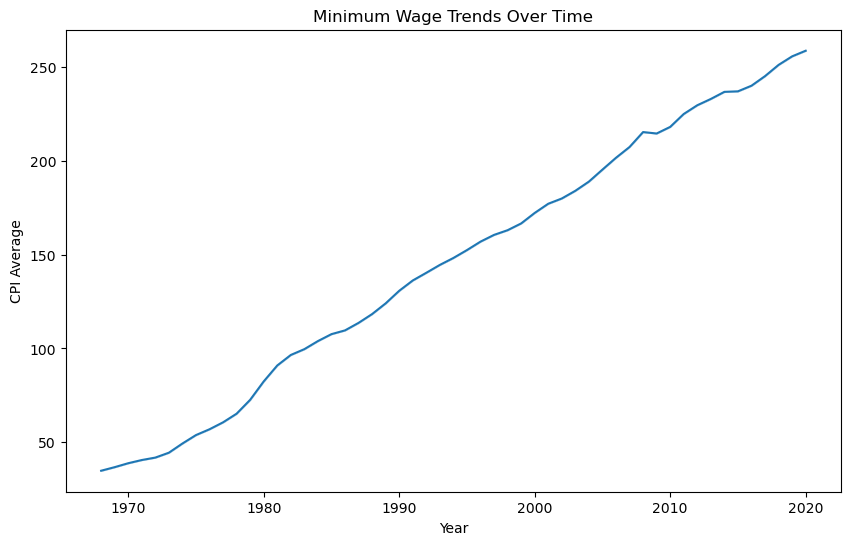

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='CPI.Average', data=dataset2)
plt.title('Minimum Wage Trends Over Time')
plt.xlabel('Year')
plt.ylabel('CPI Average')
plt.show()

De grafiek toont een gelijkmatige stijging van het gemiddelde CPI (Consumentenprijsindex) over de jaren, wat aangeeft dat het minimumloon over tijd is verhoogd. Dit kan wijzen op inflatiecorrecties en beleidsmaatregelen die gericht zijn op het verbeteren van het loonpeil.
Gestapelde Staafdiagram van Genormaliseerde Immigranten die de Status van Wettig Permanent Ingezetene Verkrijgen en Minimumloon

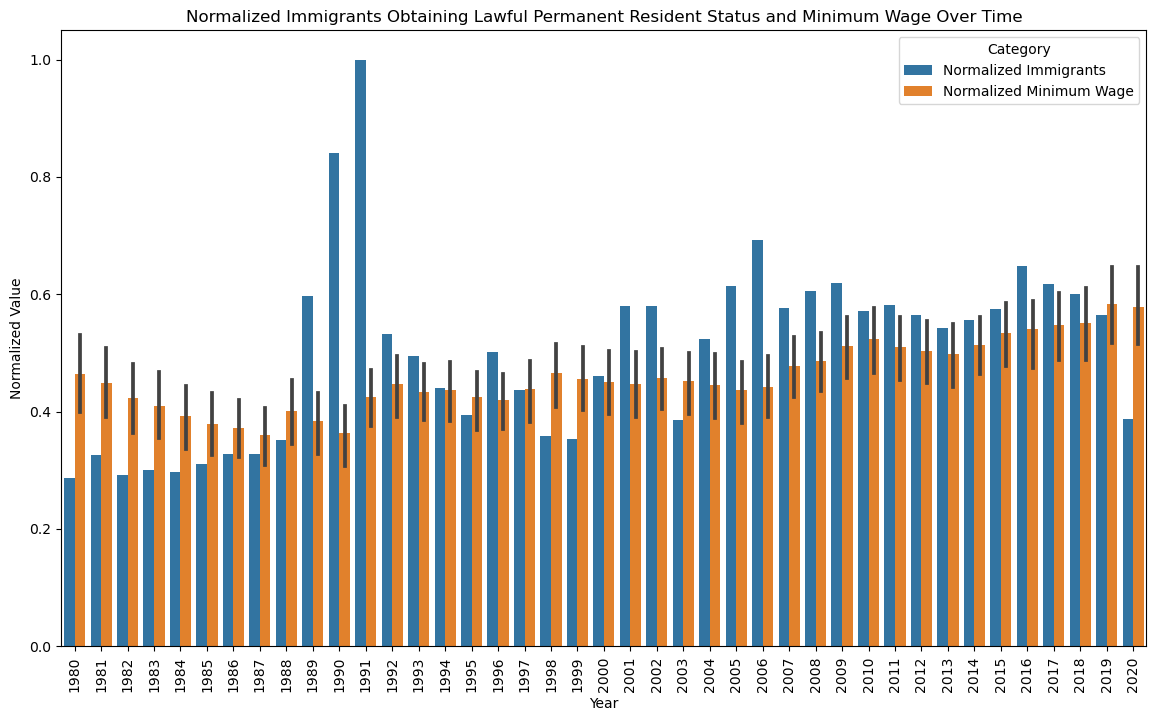

In [12]:
for column in columns_to_convert:
    dataset1[column] = dataset1[column].apply(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)

merged_data = pd.merge(dataset1, dataset2, left_on='ï»¿Year', right_on='Year')

merged_data['Normalized Immigrants'] = merged_data['Immigrants Obtaining Lawful Permanent Resident Status'] / merged_data['Immigrants Obtaining Lawful Permanent Resident Status'].max()
merged_data['Normalized Minimum Wage'] = merged_data['State.Minimum.Wage.2020.Dollars'] / merged_data['State.Minimum.Wage.2020.Dollars'].max()

bar_data = merged_data[['ï»¿Year', 'Normalized Immigrants', 'Normalized Minimum Wage']]
bar_data = bar_data.melt(id_vars=['ï»¿Year'], value_vars=['Normalized Immigrants', 'Normalized Minimum Wage'], 
                         var_name='Category', value_name='Normalized Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='ï»¿Year', y='Normalized Value', hue='Category', data=bar_data)
plt.title('Normalized Immigrants Obtaining Lawful Permanent Resident Status and Minimum Wage Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()

De genormaliseerde waarden maken het mogelijk om de trends van beide variabelen (immigranten en minimumloon) over tijd te vergelijken. Het laat zien dat hoewel de waarden verschillen in schaal, er een algemene trend van stijging is voor beide variabelen, wat suggereert dat beide factoren mogelijk in verband zijn met de economische omstandigheden.

c:\Users\Mouad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mouad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


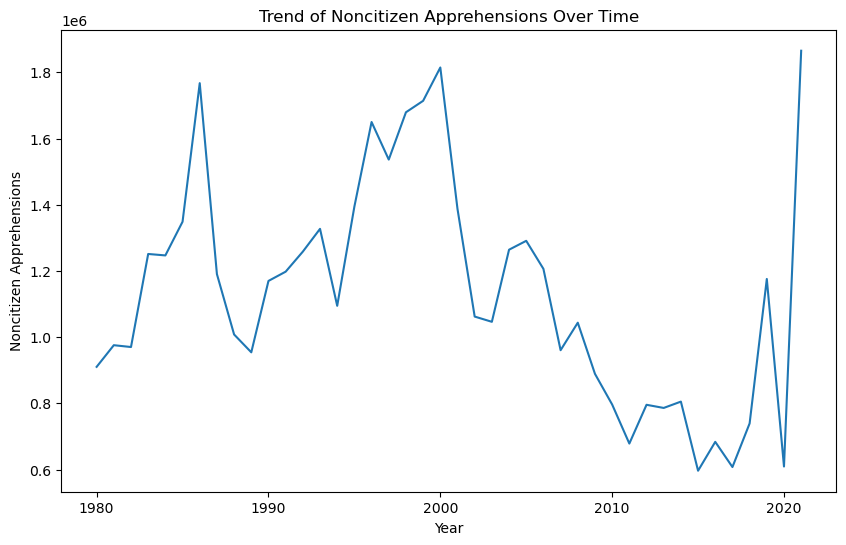

In [13]:
for column in columns_to_convert:
    dataset1[column] = dataset1[column].apply(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)

merged_data = pd.merge(dataset1, dataset2, left_on='ï»¿Year', right_on='Year')

plt.figure(figsize=(10, 6))
sns.lineplot(x='ï»¿Year', y='Noncitizen Apprehensions', data=dataset1)
plt.title('Trend of Noncitizen Apprehensions Over Time')
plt.xlabel('Year')
plt.ylabel('Noncitizen Apprehensions')
plt.show()

Deze grafiek toont de trends in het aantal aanhoudingen van niet-burgers. De data laten zien dat er pieken en dalen zijn geweest, met name rond 1990 en een opmerkelijke piek na 2020. Dit kan wijzen op veranderende immigratiehandhavingsstrategieën of externe factoren zoals politieke veranderingen en crises.

In [33]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, IntRangeSlider

# Load the datasets with proper encoding
minimum_wage_data = pd.read_csv('minimum_wage_us.csv', encoding='ISO-8859-1')

# Filtering relevant columns
merged_data = minimum_wage_data[['Year', 'State.Minimum.Wage.2020.Dollars']]

# Create a new column that groups years into 2-year intervals
merged_data['Year_Group'] = (merged_data['Year'] // 2) * 2

def update_violin_plot(year_range):
    filtered_data = merged_data[(merged_data['Year'] >= year_range[0]) & (merged_data['Year'] <= year_range[1])]
    
    fig = px.violin(filtered_data, y='State.Minimum.Wage.2020.Dollars', x='Year_Group', orientation='v',
                    title='Vertical Violin Plot of Minimum Wage (2020 Dollars) Over Time (Grouped by 2 Years)')
    
    fig.update_layout(yaxis_title='Minimum Wage (2020 Dollars)', xaxis_title='Year Group')
    fig.show()

interact(update_violin_plot, year_range=IntRangeSlider(value=[1980, 2020], min=1980, max=2020, step=2, description='Year Range'))

C:\Users\Mouad\AppData\Local\Temp\ipykernel_26128\915726654.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



interactive(children=(IntRangeSlider(value=(1980, 2020), description='Year Range', max=2020, min=1980, step=2)…

<function __main__.update_violin_plot(year_range)>

De boxplot toont de spreiding van het minimumloon over de jaren. We zien een daling in de vroege jaren en een geleidelijke stijging vanaf het begin van de 21e eeuw. De aanwezigheid van uitschieters kan wijzen op jaren waarin er significante afwijkingen waren van de algemene loontrend, mogelijk als gevolg van uitzonderlijke economische omstandigheden of beleidswijzigingen.